In [9]:

import numpy as np

from HW2.benchmark_proceeder import BenchmarkStorage
from HW2.optimization import MomentumOptimization, NesterovOptimization, AdaGradOptimization, RMSPropOptimization, \
    AdamOptimization

from HW2.regression_generator import generate_regression
from HW2.sgd import sgd, minibatch_gd, gd
from HW2.visualization import visualize_regression_point, draw_multiple_levels

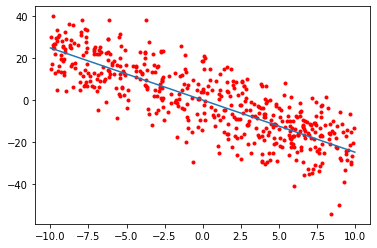

In [10]:
f, points = generate_regression(point_count=500, scale=3, y_scale=10)

visualize_regression_point(f, points)

storage = BenchmarkStorage()

In [11]:
start_point = np.array([0.0, 0.0])

_, meta_sgd = sgd(points, ab=start_point.copy())
_, meta_momentum = sgd(points, optimization=MomentumOptimization(0.95), ab=start_point.copy())
# noinspection SpellCheckingInspection
_, meta_nesterov = sgd(points, optimization=NesterovOptimization(0.95), ab=start_point.copy())
_, meta_adagrad = sgd(points, optimization=AdaGradOptimization(), eps=5e-3, ab=start_point.copy())
_, meta_rmsprop = sgd(points, optimization=RMSPropOptimization(0.95), lr=0.01, eps=1e-2, ab=start_point.copy())
_, meta_adam = sgd(points, optimization=AdamOptimization(), ab=start_point.copy())

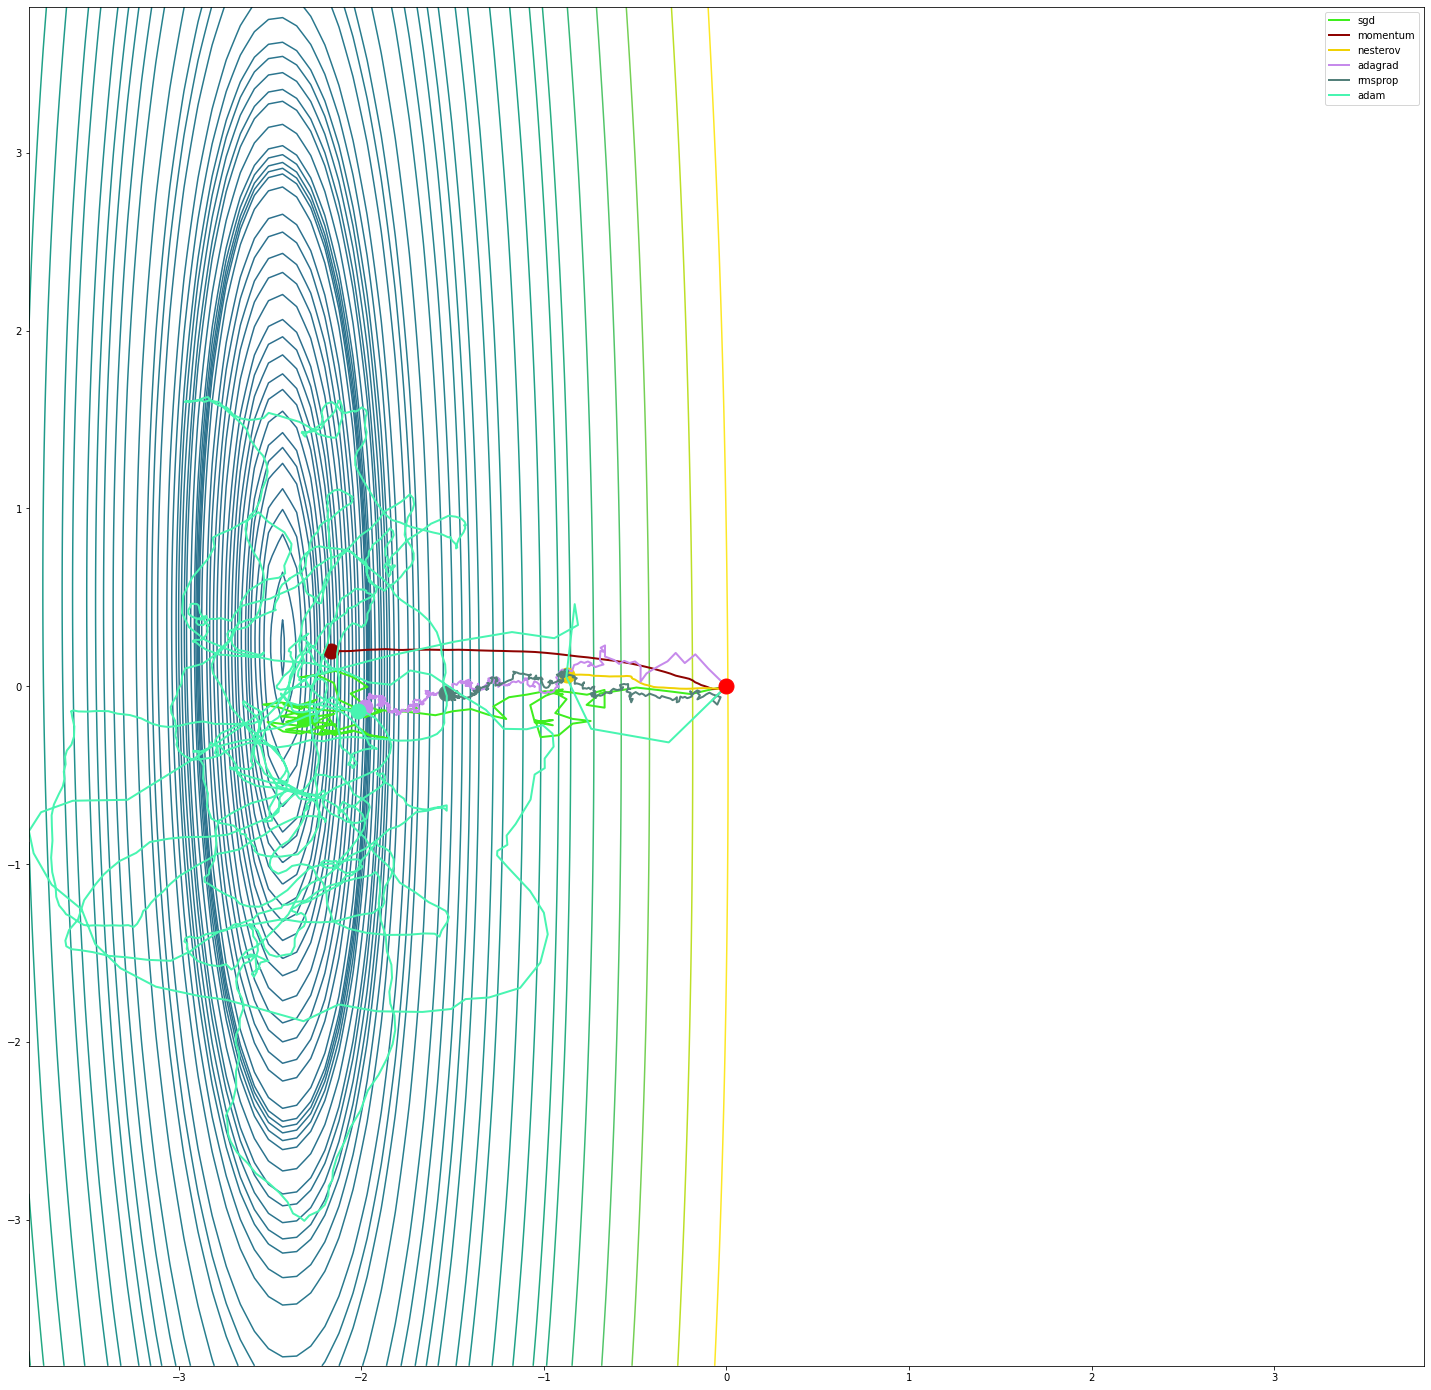

In [12]:
draw_multiple_levels(
    start_point.copy(),
    generated_points=points,
    grad_points_list=
    [
        meta_sgd["points"],
        meta_momentum["points"],
        meta_nesterov["points"],
        meta_adagrad["points"],
        meta_rmsprop["points"],
        meta_adam["points"],
    ],
    label_list=
    [
        "sgd",
        "momentum",
        "nesterov",
        "adagrad",
        "rmsprop",
        "adam",
    ],
    stride=50
)

In [13]:
start_point = np.array([0.0, 0.0])
batch_size=5

_, meta_minigd5 = minibatch_gd(points, batch_size=batch_size, ab=start_point.copy())
_, meta_momentum = minibatch_gd(points, batch_size=batch_size, optimization=MomentumOptimization(0.95), ab=start_point.copy())
# noinspection SpellCheckingInspection
_, meta_nesterov = minibatch_gd(points, batch_size=batch_size, optimization=NesterovOptimization(0.95), ab=start_point.copy())
_, meta_adagrad = minibatch_gd(points, batch_size=batch_size, optimization=AdaGradOptimization(), eps=5e-3, ab=start_point.copy())
_, meta_rmsprop = minibatch_gd(points, batch_size=batch_size, optimization=RMSPropOptimization(0.95), lr=0.01, eps=1e-2, ab=start_point.copy())
_, meta_adam = minibatch_gd(points, batch_size=batch_size, optimization=AdamOptimization(), ab=start_point.copy())

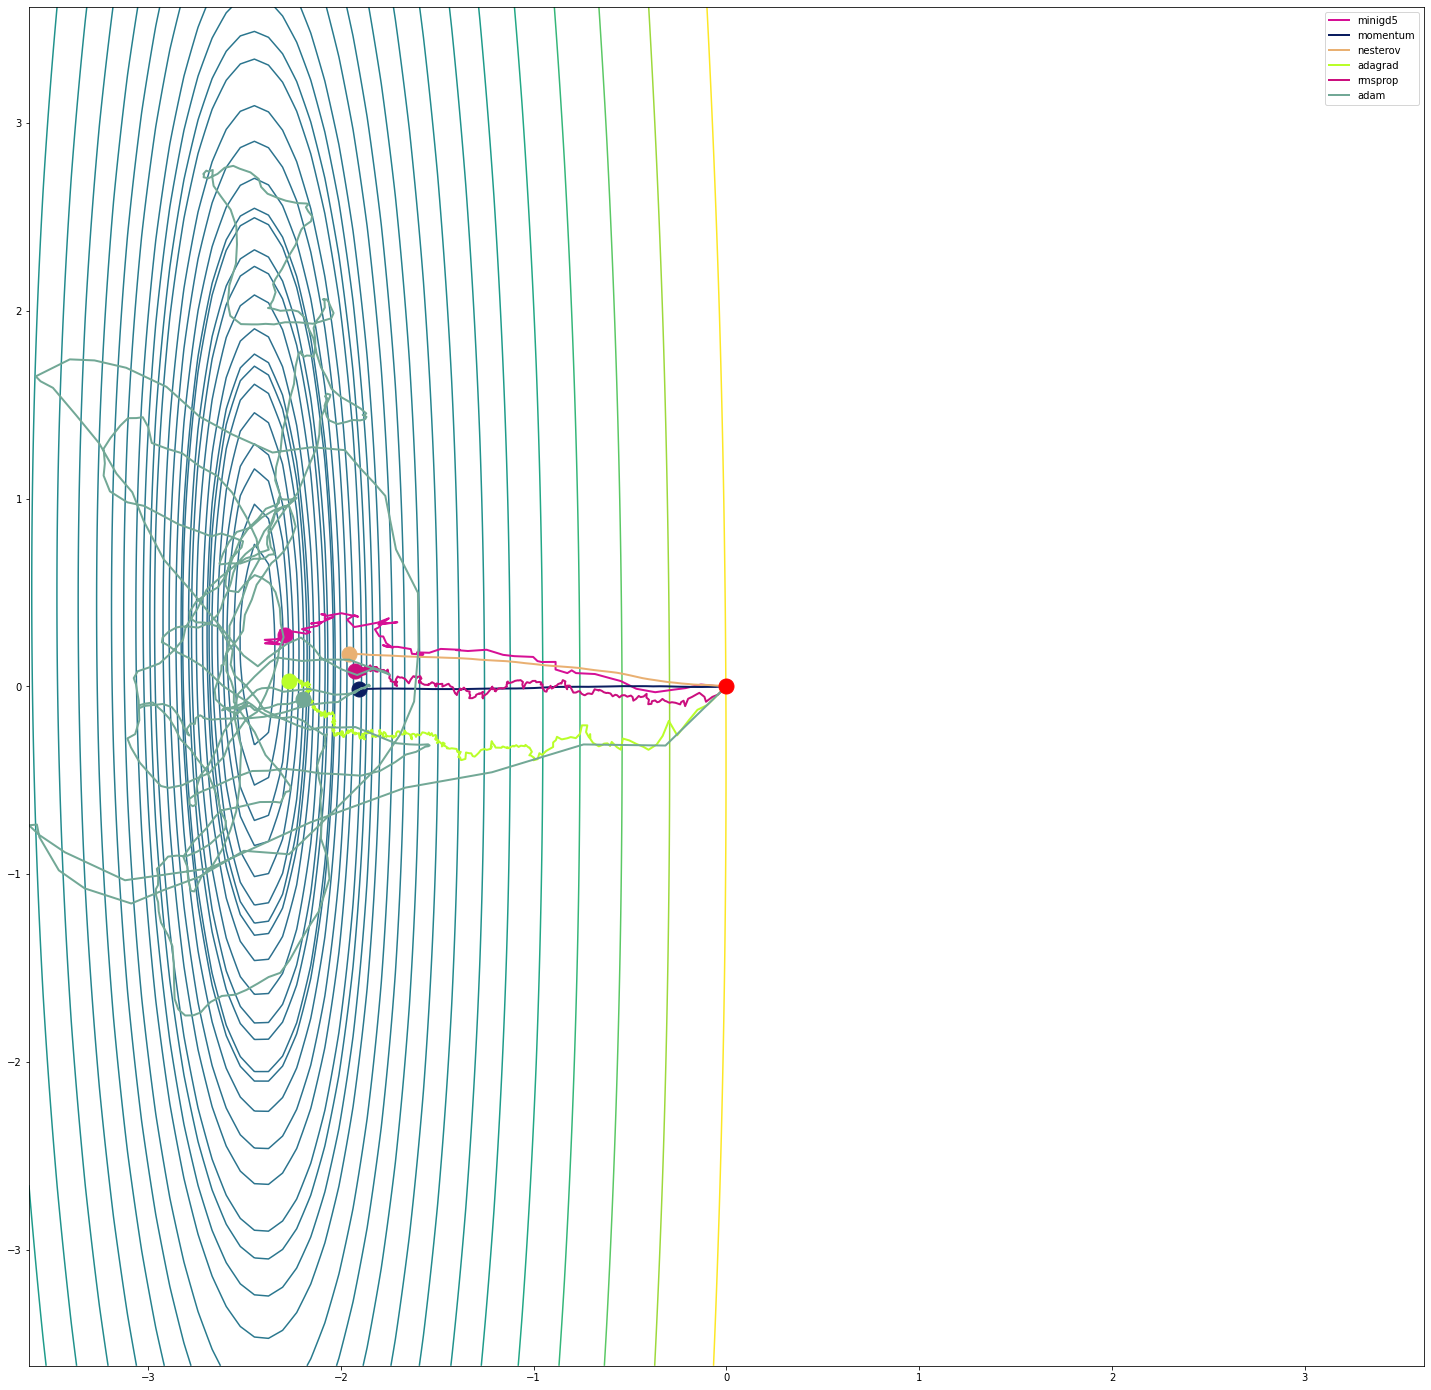

In [14]:
draw_multiple_levels(
    start_point.copy(),
    generated_points=points,
    grad_points_list=
    [
        meta_minigd5["points"],
        meta_momentum["points"],
        meta_nesterov["points"],
        meta_adagrad["points"],
        meta_rmsprop["points"],
        meta_adam["points"],
    ],
    label_list=
    [
        "minigd5",
        "momentum",
        "nesterov",
        "adagrad",
        "rmsprop",
        "adam",
    ],
    stride=50
)

In [15]:
start_point = np.array([0.0, 0.0])
batch_size=100

_, meta_minigd100 = minibatch_gd(points, batch_size=batch_size, ab=start_point.copy())
_, meta_momentum = minibatch_gd(points, batch_size=batch_size, optimization=MomentumOptimization(0.95), ab=start_point.copy())
# noinspection SpellCheckingInspection
_, meta_nesterov = minibatch_gd(points, batch_size=batch_size, optimization=NesterovOptimization(0.95), ab=start_point.copy())
_, meta_adagrad = minibatch_gd(points, batch_size=batch_size, optimization=AdaGradOptimization(), eps=5e-3, ab=start_point.copy())
_, meta_rmsprop = minibatch_gd(points, batch_size=batch_size, optimization=RMSPropOptimization(0.95), lr=0.01, eps=1e-2, ab=start_point.copy())
_, meta_adam = minibatch_gd(points, batch_size=batch_size, optimization=AdamOptimization(), ab=start_point.copy())

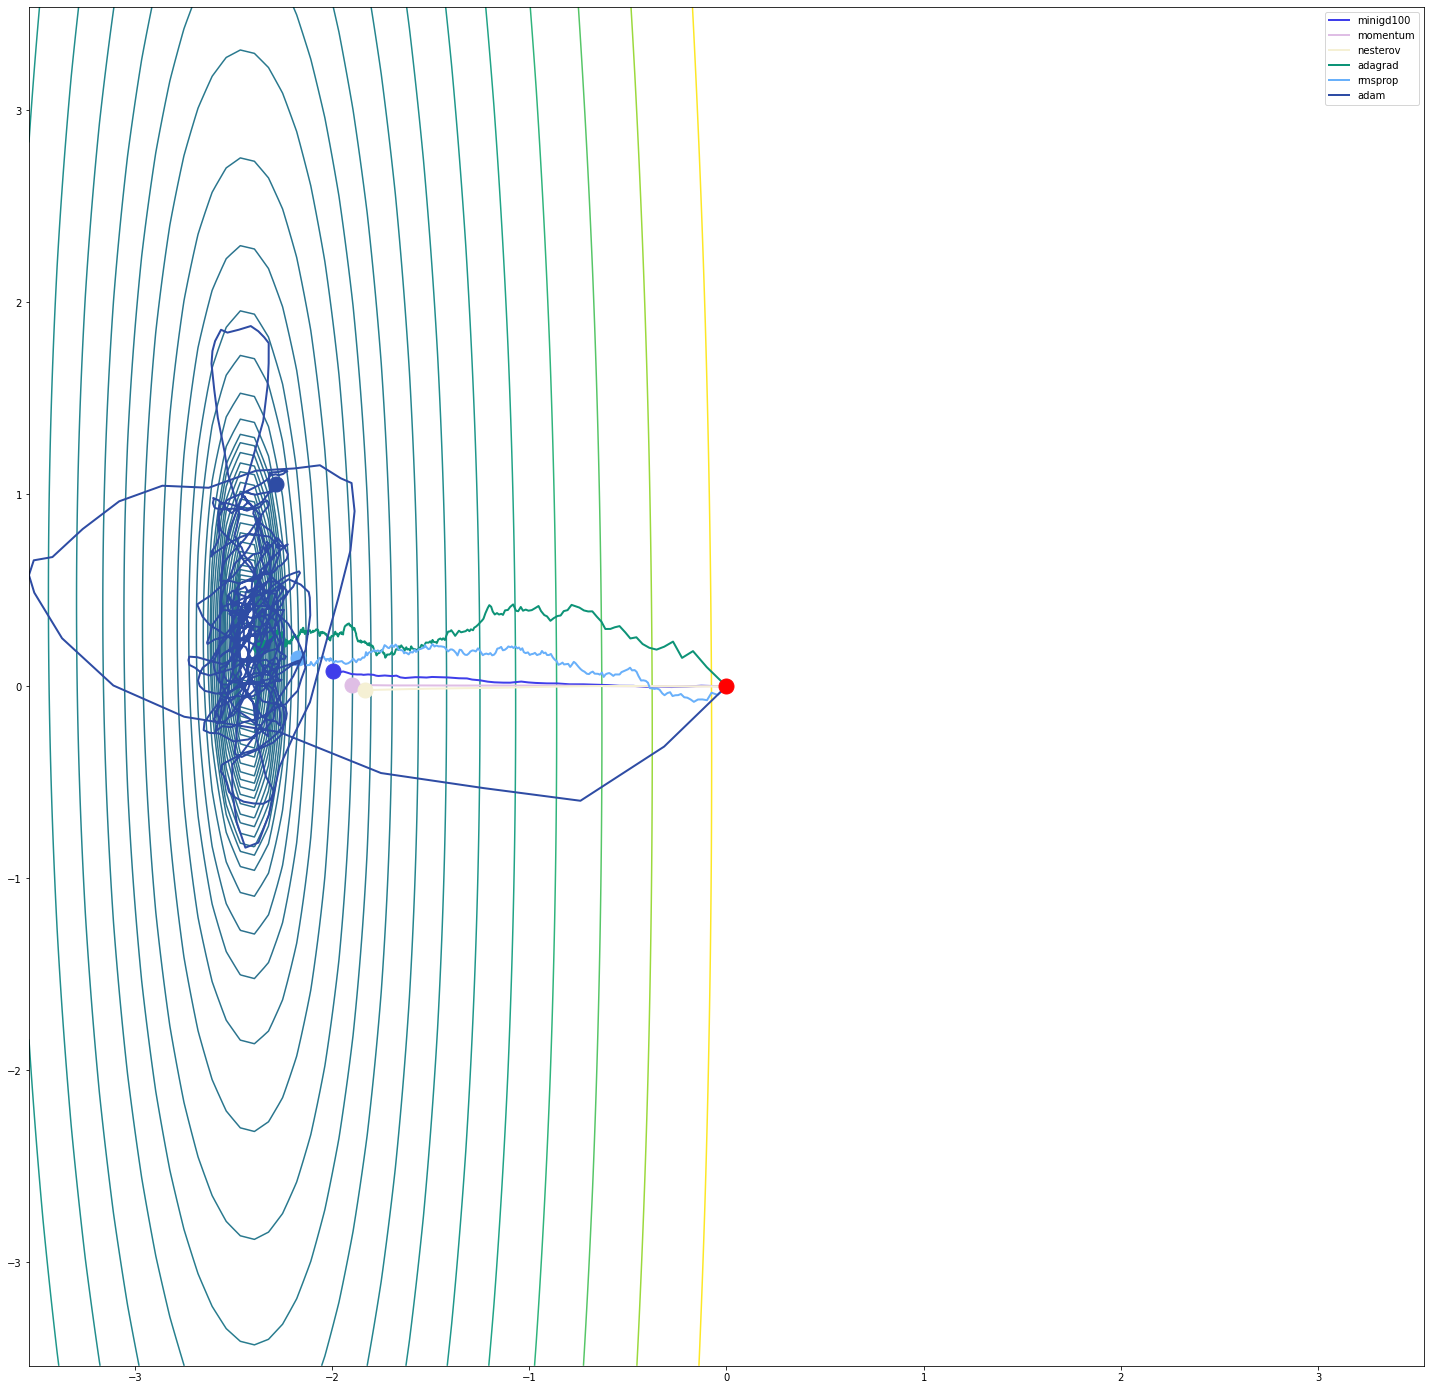

In [16]:
draw_multiple_levels(
    start_point.copy(),
    generated_points=points,
    grad_points_list=
    [
        meta_minigd100["points"],
        meta_momentum["points"],
        meta_nesterov["points"],
        meta_adagrad["points"],
        meta_rmsprop["points"],
        meta_adam["points"],
    ],
    label_list=
    [
        "minigd100",
        "momentum",
        "nesterov",
        "adagrad",
        "rmsprop",
        "adam",
    ],
    stride=50
)

In [17]:
start_point = np.array([0.0, 0.0])

_, meta_gd = gd(points, ab=start_point.copy())
_, meta_momentum = gd(points, optimization=MomentumOptimization(0.95), ab=start_point.copy())
# noinspection SpellCheckingInspection
_, meta_nesterov = gd(points, optimization=NesterovOptimization(0.95), ab=start_point.copy())
_, meta_adagrad = gd(points, optimization=AdaGradOptimization(), eps=5e-3, ab=start_point.copy())
_, meta_rmsprop = gd(points, optimization=RMSPropOptimization(0.95), lr=0.01, eps=1e-2, ab=start_point.copy())
_, meta_adam = gd(points, optimization=AdamOptimization(), ab=start_point.copy())

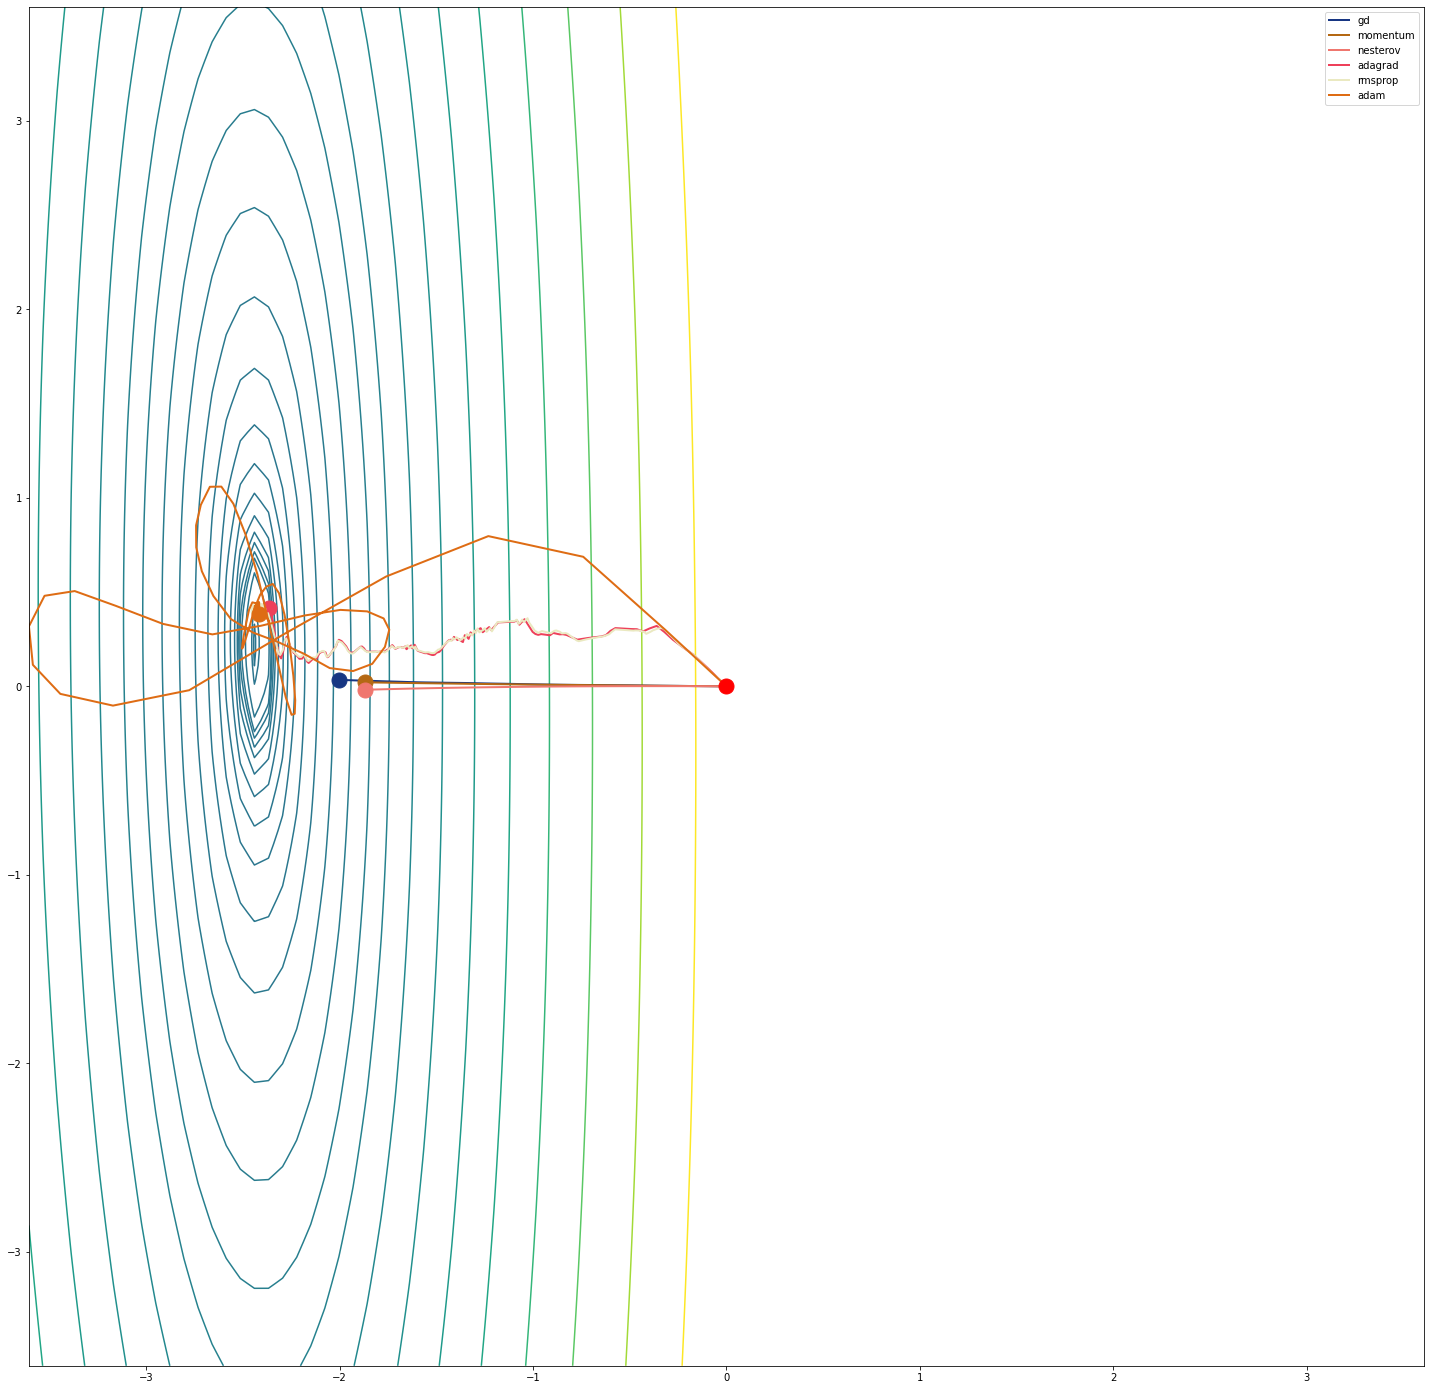

In [18]:
draw_multiple_levels(
    start_point.copy(),
    generated_points=points,
    grad_points_list=
    [
        meta_gd["points"],
        meta_momentum["points"],
        meta_nesterov["points"],
        meta_adagrad["points"],
        meta_rmsprop["points"],
        meta_adam["points"],
    ],
    label_list=
    [
        "gd",
        "momentum",
        "nesterov",
        "adagrad",
        "rmsprop",
        "adam",
    ],
    stride=50
)